## Dataloading

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from ast import literal_eval
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.rcParams.update({'font.size': 24})

### Load data

In [26]:
df = pd.read_csv('results.csv', index_col=False)

del df['Unnamed: 0']

a = []

df['target'] = df['target'].apply(literal_eval)
joe = df['target'].values
for v in joe:
    a.append(np.array(v))
joe = np.array(a).argmax(1)
df['target'] = joe

df['mean0'] = df['mean0'].astype('float64')
df['std0'] = df['std0'].astype('float64')
df['mean1'] = df['mean1'].astype('float64')
df['std1'] = df['std1'].astype('float64')
display(df.head())

,target,mean0,std0,mean1,std1,text
0,0,0.999086,0.000652,0.000914,0.000652,...
1,0,0.969981,0.012336,0.030019,0.012336,...
2,1,0.230962,0.083058,0.769038,0.083058,classics and is not only a <UNK> little 20 min...
3,0,0.982669,0.009936,0.017331,0.009936,<UNK> a nerd thing it's just an example of how...
4,1,0.135886,0.054573,0.864114,0.054573,<UNK> travels back towards the hospital but is...


In [27]:
def classify(x, threshold):
    mean = np.array([x['mean0'], x['mean1']])
    std = np.array([x['std0'], x['std1']])
    if (std[mean.argmax()] <= threshold):
        return mean.argmax()
    else:
        return -1

In [28]:
df['std1'].max()

0.14538480546045815

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:14<00:00,  2.67it/s]


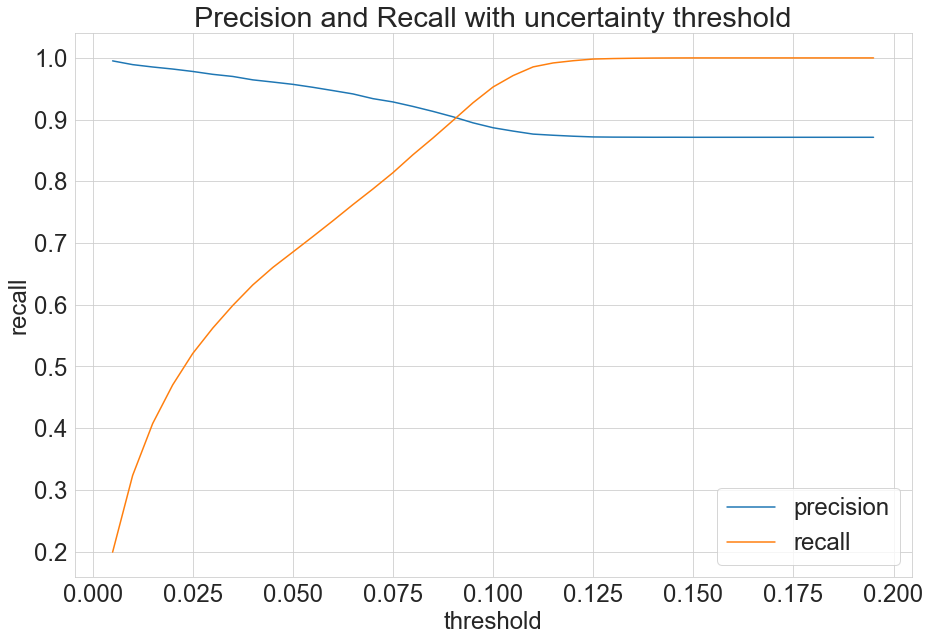

In [29]:
from tqdm import tqdm

sns.set_style('whitegrid')

thresholds = list(np.arange(0,0.2,0.005))
precisions = []
recalls = []

for t in tqdm(thresholds):
    testdf = df
    testdf['test'] = testdf.apply(classify, args=[t], axis=1)
    certain = df[df['test']!=-1]
#     print(len(certain))
    precision = certain['target'] == certain['test']
#     print('precision',precision.mean())
    recall = len(certain)/12500
#     print('recall',recall.mean())
    precisions.append(precision.mean())
    recalls.append(recall)

datf = pd.DataFrame({'threshold':thresholds[1:], 'precision':precisions[1:], 'recall':recalls[1:]})
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(data=datf, x='threshold', y='precision')
sns.lineplot(data=datf, x='threshold', y='recall')
plt.title('Precision and Recall with uncertainty threshold')
plt.legend(['precision','recall'])
# plt.set_xlabel('confidence threshold')
# plt.set_ylabel('precision/recall')

In [6]:
testdf = df
testdf['test'] = testdf.apply(classify, args=[0.075], axis=1)
certain = df[df['test']!=-1]
#     print(len(certain))
precision = certain['target'] == certain['test']
#     print('precision',precision.mean())
recall = len(certain)/12500

print('precision',precision.mean())
print('recall',recall)

precision 0.9286486486486486
recall 0.814


In [30]:
df['test'] = df.apply(classify, args=[1], axis=1)
sortd = df.sort_values(['std0'])
sortd = sortd[sortd['target'] != sortd['test']]
sortd = sortd.reset_index(drop=True)
sortd.head()

,target,mean0,std0,mean1,std1,text,test
0,1,0.998759,0.000885,0.001241,0.000885,...,0
1,0,0.001844,0.001418,0.998156,0.001418,...,1
2,0,0.002696,0.002111,0.997304,0.002111,want to get a good idea of how the actual germ...,1
3,0,0.003563,0.002438,0.996437,0.002438,...,1
4,1,0.994419,0.003092,0.005581,0.003092,wheelchair runs over it there are loads of <UN...,0


In [31]:
i = 0

4
wheelchair runs over it there are loads of <UNK> someone has their guts removed with a hook there's a rotten corpse complete with <UNK> someone hand is cut off someone has their head <UNK> in their eye falls out a gory death by piano wire as it <UNK> through <UNK> throat there are loads of severed limbs <UNK> of blood <UNK> around a scene of some cats eating brains there's more as well having said that some of the special effects are a bit fake look cheesy br br with a supposed budget of around 100 000 it shows this is pretty cheap looking it has no visual style or artistic merit but then again why would you want those when you can see a nazi orgy sequence wall to wall gore the acting in this is terrible including fulci br br un <UNK> <UNK> is a top film if your a gore <UNK> like me however if your looking for something with a little bit more substance or indeed any substance then this ones not for you this is the sort of film which <UNK> people straight down the middle you'll either

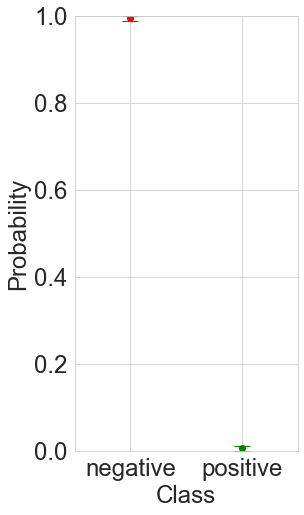

In [36]:
print(i)
s = sortd.iloc[i]
print(s['text'])
if s['target'] == 0:
    colors = ['green', 'red']
else:
    colors = ['red', 'green']

x_0 = [0]
x_1 = [1]
y_0 = [s['mean0']]
y_1 = [s['mean1']]
err_0 = [s['std0']*2]
err_1 = [s['std1']*2]
print(err_0, err_1)
plt.figure(figsize=(4,8))
plt.errorbar(x_0, y_0, yerr=err_0, fmt='o', capsize=8, color=colors[0])
plt.errorbar(x_1, y_1, yerr=err_1, fmt='o', capsize=8, color=colors[1])

plt.xticks([0, 1], ['negative', 'positive'])
plt.ylim([0,1])
plt.xlim([-0.5, 1.5])
plt.xlabel('Class')
plt.ylabel('Probability')

i += 1

In [ ]:
df['y_pred'] = df.apply(classify, args=[0.075], axis=1)

for t in thresholds:
    testdf = df
    testdf['test'] = testdf.apply(classify, args=[1-t], axis=1)
    certain = df[df['test']!=-1]
    precision = certain['target'] == certain['test']
#     print('precision',precision.mean())
    recall = df['target'] == df['test']
#     print('recall',recall.mean())
    precisions.append(precision.mean())
    recalls.append(recall.mean())
    
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.title('Precision and Recall with confidence threshold')
plt.legend(['precision','recall'])
plt.set_xlabel('confidence threshold')
plt.set_ylabel('precision/recall')

In [ ]:
i = 62

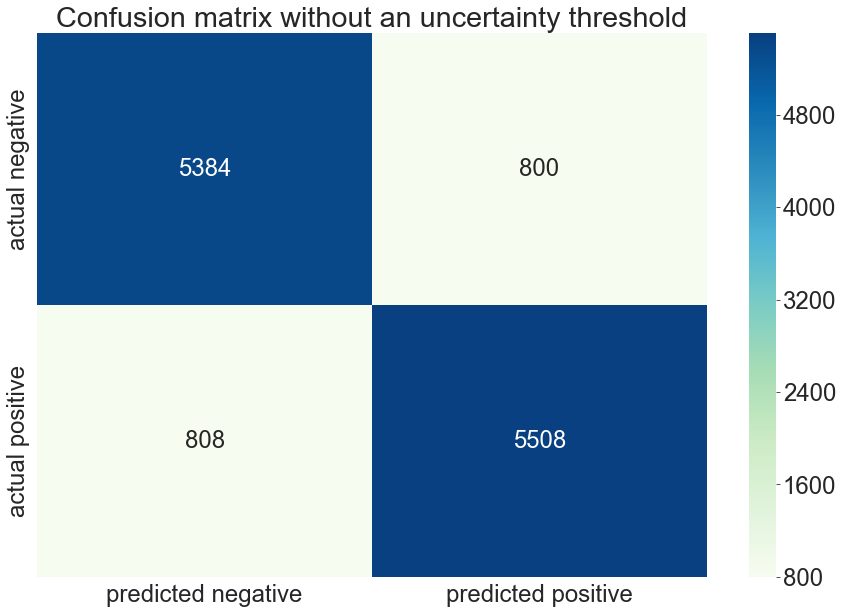

In [18]:
df['y_pred'] = df.apply(classify, args=[1], axis=1)

tdf = df[df['y_pred'] != -1]

cm = confusion_matrix(tdf['target'].values, tdf['y_pred'].values)

df_cm = pd.DataFrame(cm, index = ['negative', 'positive'],
                  columns = ['predicted negative', 'predicted positive'])


fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_cm, annot=True, fmt='g', cmap='GnBu', ax=ax)
plt.yticks(np.arange(2)+0.5,['actual negative', 'actual positive'], va='center')
plt.title('Confusion matrix without an uncertainty threshold')
plt.show()

# Mean TF-IDF per document

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from keras.datasets import imdb

In [ ]:
# reconstruct imdb reviews from the keras dataset

# credits to:
# https://gist.github.com/prinsherbert/92313f15fc814d6eed1e36ab4df1f92d 

word_to_index = imdb.get_word_index()
index_to_word = [None] * (max(word_to_index.values()) + 1)

for w, i in word_to_index.items():
    index_to_word[i] = w
    
(X_train, y_train), _ = imdb.load_data()

padding = 200

for i, review in enumerate(X_train):
    X_train[i] = review[:padding]

X_train = [
    ' '.join(
        index_to_word[i]
        for i in X_train[i]
        if i < len(index_to_word)
    ) for i in range(X_train.shape[0])
]

# X_test = [
#     ' '.join(
#         index_to_word[i]
#         for i in X_test[i]
#         if i < len(index_to_word)
#     ) for i in range(X_test.shape[0])
# ]

In [ ]:
# calculate td-idf
# vectorizer = TfidfVectorizer()
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(X_train)

In [ ]:
# compute the mean tf-idf per document
tf_idf_avg = []
for document in X_tfidf:
    tf_idf_avg.append(document.mean())

print(tf_idf_avg[:10])

In [ ]:
# plot the tf-idf of the first n documents
n = 50
y = tf_idf_avg[:n]
x = np.arange(n)
fig, ax = plt.subplots()
ax.bar(x, y)
plt.xlabel('Document')
plt.ylabel('tf-idf')
plt.show()

In [ ]:
# cluster the documents based on their tf-idf
clusters=2
model = KMeans(n_clusters=clusters, max_iter=100)
model.fit(X_tfidf)

In [ ]:
# put the results in a pandas dataframe
results = pd.DataFrame({
    'cluster': model.labels_
})
results.head()

In [ ]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(" %s" % terms[ind])

In [ ]:
test_1 = "i liked the characters, it was a good movie"
print("test 1:", test_1)
test_1 = vectorizer.transform([test_1])
predicted_1 = model.predict(test_1)
print("prediction", predicted_1)

test_2 = "bad, really bad, i hated it"
print("test 2:", test_2)
test_2 = vectorizer.transform([test_2])
predicted_2 = model.predict(test_2)
print("prediction", predicted_2)

# Document length

In [ ]:
x = np.arange(len(X_train))
y = []
for review in X_train:
    y.append(len(review.split()))

fig, ax = plt.subplots()
ax.bar(x, y)
plt.xlabel('document')
plt.ylabel('length')
plt.show()

In [ ]:
y = np.array(y)
print("average length:", y.mean())
print("standard deviation:", y.std())